# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В данных видны пропуски:

- Пропуски в количествах балконов заменим нулями;
- first_day_exposition приведем в формат datetime. Оставим только дату.
- floors_total приведем к целым числам. Пропуски заменим единицами. Скорее всего не указывают кол-во этажей, если дом одноэтажный.
- is_apartment пропуски заменим на False
- living_area  заменим пропуски нулями
- kitchen_area заменим пропуски нулями
- balcony заменим пропуски нулями
- ceiling_height заменим пропуски нулями
- locality_name Если рассматриваем Ленинградскую область, то можно предположить, что пропуски это Санкт-Питербург.
- Пропуски в парках и озерах так же заменил нулями.

Пропуски в остальных столбцах пока оставим как есть.

## Предобработка данных

In [2]:
#Заменяем пропуски и меняем тип данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)
#data['living_area'] = data['living_area'].fillna(0)
data['median_living_area'] = data.groupby('rooms')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(data['median_living_area'])
#data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['median_kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(data['median_kitchen_area'])
data['balcony'] = data['balcony'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(1)
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype('int')

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_aroun

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482,2,755,0,45.0,9.50
1,7,3350000.0,40.4,2018-12-04,1,2.50,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0,0,0,0,81,17.6,9.04
2,10,5196000.0,56.0,2015-08-20,2,2.50,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558,30.5,8.80
3,0,64900000.0,159.0,2015-07-24,3,2.50,14.0,45.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424,45.0,9.50
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121,30.5,8.80


## Расчёты и добавление результатов в таблицу

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [3]:
#Цена квадрата. Копейки не важны.
data['prise_miter']=(data['last_price']/data['total_area']).astype('int')
#ДОбавили столбцы с днем, месяце и годом.
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

#пишем функцию перебора и категоризации:
def floor(row):
    floors_total = row['floors_total']
    floors = row['floor']
    if floors == 1:
        return 'первый'
    elif floors == floors_total:
        return 'последний'
    else:
        return 'другой'
    
#Создаем столбец и заполняем нашей функцией. 
data['floor_category'] = data.apply(floor, axis = 1)
#Проверяем
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,prise_miter,weekday,month,year,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755,0,45.0,9.50,120370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.50,11.0,18.60,1,False,...,0,0,81,17.6,9.04,82920,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.50,5.0,34.30,4,False,...,2,574,558,30.5,8.80,92785,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.50,14.0,45.00,9,False,...,3,234,424,45.0,9.50,408176,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1,48,121,30.5,8.80,100000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.50,12.0,14.40,5,False,...,0,0,55,17.6,9.04,95065,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.50,26.0,10.60,6,False,...,0,0,155,17.6,9.04,99195,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.50,24.0,30.50,22,False,...,0,0,0,30.5,8.80,110544,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.50,27.0,15.43,26,False,...,0,0,189,17.6,9.04,87454,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,0,289,45.0,9.50,88524,6,2,2017,другой


## Исследовательский анализ данных

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

(1, 200)

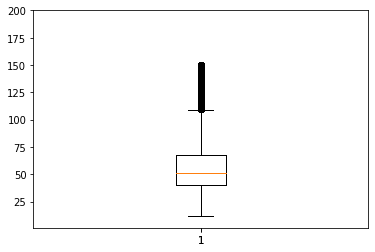

In [4]:
#Строим гистограммы по метражу.
#data.plot(y='total_area',kind='hist',bins=100,grid=True, figsize = (5,3), range = (0,400))
data=data.query('total_area<=150')
data['total_area'].describe()
#Откинули строчки с прощадью более 150м
#data_clean_total_area.plot(y='total_area',kind='hist',bins=100,grid=True, figsize = (5,3), range = (0,400))
plt.boxplot(data['total_area'])
plt.ylim(1,200)
plt.boxplot(data['total_area'])
plt.ylim(1,200)

По гистограмме видим нормальное распределение. Выбросы есть, но на картину не влияют. Для точности можно откинуть более 150

В большенстве своем квартиры продаются с прощадью 60м2

count    2.241000e+04
mean     5.132281e+06
std      2.675025e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.290000e+06
max      1.500000e+07
Name: last_price, dtype: float64

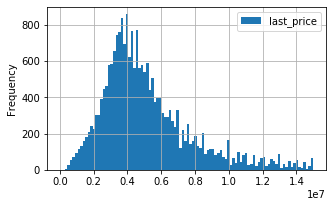

In [5]:
data=data.query('last_price<=15000000')
data.plot(y='last_price',kind='hist',bins=100,grid=True, figsize = (5,3), range = (0,15000000))
data['last_price'].describe()


Откинем выбросы свыше 15 млн.
По гистограмме видим нормальное распределение. Данные в порядке.

Цены на недвижимость в среднем около 4 млн.руб.
Распределение по Гауссу.

count    22410.000000
mean         1.967336
std          0.932648
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

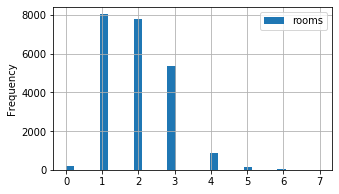

In [6]:
#Проверим число комнат

data=data.query('rooms<=8')
data.plot(y='rooms',kind='hist',bins=30,grid=True, figsize = (5,3))
data['rooms'].describe()

Отбрасываем подозрительные строки с комнатами больше 8

В продаже преобладают однушки и двушки.

count    22385.000000
mean         2.621917
std          0.226731
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

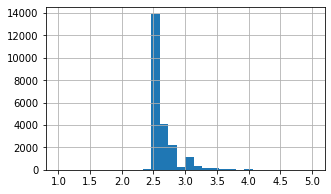

In [7]:
#теперь высота потолков
data=data.query('ceiling_height<=10')
data['ceiling_height'].hist(bins = 30, range = (1,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Самая распространенная высота потолков 2,5. Отбросил лишнее.

'Среднее'

153.82850122850124

'Медиана'

72.0

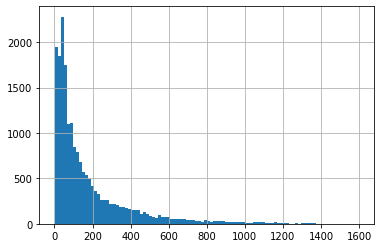

In [8]:
#Изучите время продажи квартиры.
data['days_exposition'].hist(bins=100, grid = True, range = (1,1600))
display('Среднее', data['days_exposition'].mean())
display('Медиана',data['days_exposition'].median())

Гистограмма имеет нормальное распределение. В основном квартиры продаются за первые 100 дней. Медиана и среднее различаются значительно из-за аномально долгих продаж.

'Среднее'

147.39750272760335

'Медиана'

100.0

count    16498.000000
mean       147.397503
std        139.134892
min          1.000000
25%         41.000000
50%        100.000000
75%        210.000000
max        599.000000
Name: days_exposition, dtype: float64

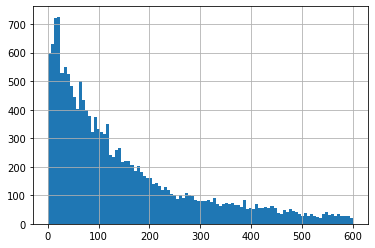

In [9]:
#Уберите редкие и выбивающиеся значения
data=data.query('days_exposition!=0 and days_exposition!=30 and days_exposition!=45 and days_exposition!=7 and days_exposition!=60 and days_exposition!=90 and days_exposition<600')

data['days_exposition'].hist(bins=100, grid = True, range = (1,600))
display('Среднее', data['days_exposition'].mean())
display('Медиана',data['days_exposition'].median())
data['days_exposition'].describe()
# при ближайшем рассмотрении есть выбросы на 45,60,90 дней
# а потом еще 7 дней и 30 дней. тоже откинем

Есть аномальные выбросы на 7,30,45,60,90 дней. Подозрительно кратные месяцу и недели. Возможно это связано с правилами сервиса. Для красоты картины откинем эти значения.

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

0.7488827497791954

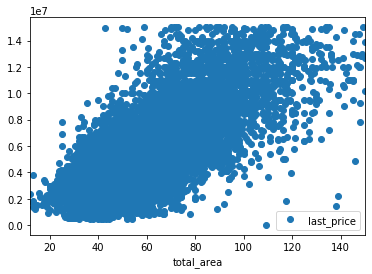

In [10]:
#pivot_price_aria=data.pivot_table(index = 'total_area', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
#pivot_price_aria.columns = ['mean', 'count', 'median']
#pivot_price_aria.plot(y = 'median', style = 'x')
data.plot(x='total_area',y = 'last_price', style = 'o')
data['total_area'].corr(data['last_price'])


Чем больше площадь, тем выше цена.

In [11]:
# код ревьюера
data['total_area'].corr(data['last_price'])

0.7488827497791954

0.487063468047558

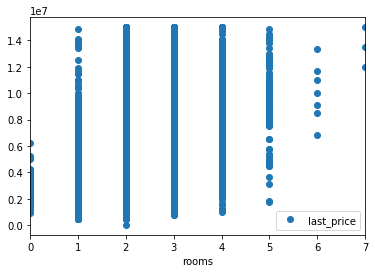

In [12]:
#pivot_price_rooms=data.pivot_table(index = 'rooms', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
#pivot_price_rooms.columns = ['mean', 'count', 'median']
#pivot_price_rooms.plot(y = 'median', style = 'x')
#display(pivot_price_rooms)
#отрежем многоквартирные, но редкие продажи. Реже 60 штук (это мксимум 7 комнат)
#pivot_price_rooms.query('count>60').plot(y = 'median', style = 'x-')
#display(data['rooms'].corr(pivot_price_rooms['median']))
data.plot(x='rooms',y = 'last_price', style = 'o')
data['rooms'].corr(data['last_price'])


K корреляции 0,3. Зависимость слабая, но имеется. Чем больше комнат, тем выше цена.

-0.35510927308312124

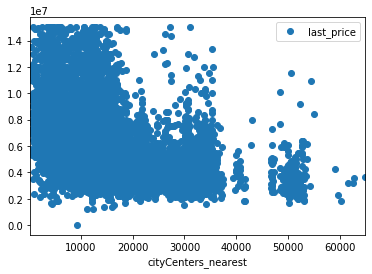

In [13]:

#pivot_price_cent=data.pivot_table(index = 'cityCenters_nearest', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
#pivot_price_cent.columns = ['mean', 'count', 'median']
#pivot_price_cent.plot(y = 'median', style = 'x')
#display(pivot_price_cent)
#data['cityCenters_nearest'].corr(pivot_price_cent['median'])
data.plot(x='cityCenters_nearest',y = 'last_price', style = 'o')
data['cityCenters_nearest'].corr(data['last_price'])



Коэфициент корреляции практически нулевой. Несомненно, цены в самом центре местами выше, но на цену не сильно влияет удаленность в целом по рынку.

,mean,count,median
floor_category,,,
другой,97000.611831,12273,96072.0
первый,79207.324901,2016,80495.5
последний,86188.725215,2209,86879.0


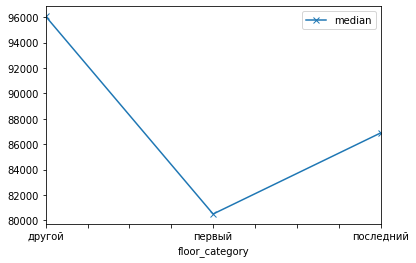

In [14]:
pivot_price_floor=data.pivot_table(index = 'floor_category', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_floor.columns = ['mean', 'count', 'median']
pivot_price_floor.plot(y = 'median', style = 'x-')
display(pivot_price_floor)

Первые этажи не пользуются популярностью.

Последний лучше, но предпочитают покупать на других этажах

,mean,count,median
weekday,,,
0,93619.426136,2464,93478.0
1,93552.334823,2909,93181.0
2,93635.855876,2706,93634.5
3,93670.042249,3006,93205.5
4,93109.812714,2926,92531.5
5,92818.465064,1331,92007.0
6,92394.377163,1156,91855.5


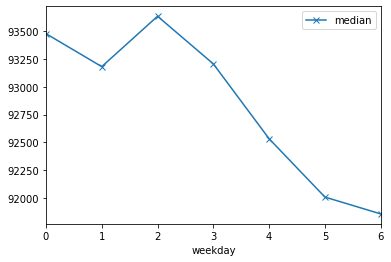

In [15]:
#день
pivot_price_weekday=data.pivot_table(index = 'weekday', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_weekday.columns = ['mean', 'count', 'median']
pivot_price_weekday.plot(y = 'median', style = 'x-')
display(pivot_price_weekday)
#data['weekday'].corr(pivot_price_weekday['median'])


Пик продаж приходится на вторник,затем идет плавны спад продаж. В субботу минимум, а затем снова рост. Размещайте обьявнение по воскресеньям)



,mean,count,median
month,,,
1,94418.206653,992,94551.0
2,93158.586836,1808,93298.5
3,93677.323415,1546,93024.5
4,92812.278088,1255,91743.0
5,93761.043716,915,92000.0
6,90632.041014,1341,90909.0
7,93080.052083,1248,92899.0
8,95170.389513,1335,95092.0
9,94825.454128,1526,93963.0


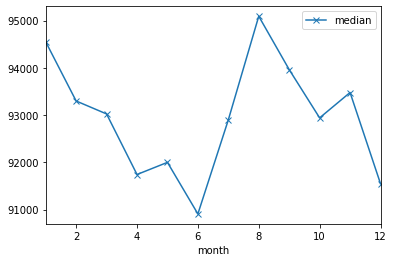

In [16]:
#месяц
pivot_price_month=data.pivot_table(index = 'month', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_month.columns = ['mean', 'count', 'median']
pivot_price_month.plot(y = 'median', style = 'x-')
display(pivot_price_month)
#data['month'].corr(pivot_price_month['median'])

Больше всего продаж в марте, а вот апрель и май самые неудачные месяцы для продажи.

,mean,count,median
year,,,
2014,93861.708333,24,99862.5
2015,90665.801085,553,89890.0
2016,91041.566122,2019,90000.0
2017,91858.617442,6731,91176.0
2018,94496.034136,6269,94995.0
2019,103837.679601,902,103359.0


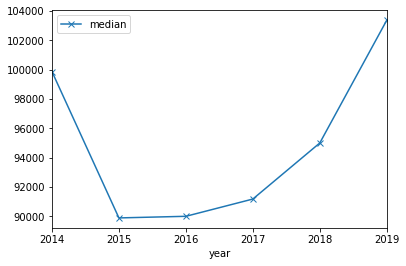

In [17]:
#год
pivot_price_year=data.pivot_table(index = 'year', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_year.columns = ['mean', 'count', 'median']
pivot_price_year.plot(y = 'median', style = 'x-')
display(pivot_price_year)
#data['year'].corr(pivot_price_year['median'])

2016 был сложный для продажи недвижимости, но затем всё начало исправляться

In [18]:
pivot_price_sity=data.pivot_table(index='locality_name',values='prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_sity.columns=['mean', 'count', 'median']
pivot_price_sity=pivot_price_sity.sort_values('count',ascending = False).head(10)

Больше всего объявлений и самая высокая цена в Питере, а самая низкая цена и меньшее число объявлений в Выборге.

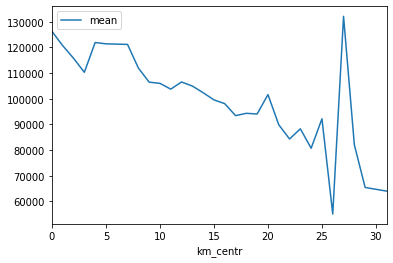

In [19]:
#data['spb_centr']=data.query('locality_name=="Санкт-Петербург" and ')
data['km_centr']=data['cityCenters_nearest']/1000
data['km_centr']=data['km_centr'].fillna('1000001')
data['km_centr']=data['km_centr'].astype('int')
pivot_price_km=data.query('locality_name=="Санкт-Петербург" and km_centr!=1000001').pivot_table(index = 'km_centr', values = 'prise_miter', aggfunc = ['mean'])
pivot_price_km.columns=['mean']
pivot_price_km.plot()

Отсекаем центр радиусом 10 км.

In [20]:
#Выделим питерские квартиры в центре
spb_sentr=data.query('locality_name=="Санкт-Петербург" and km_centr<=10')

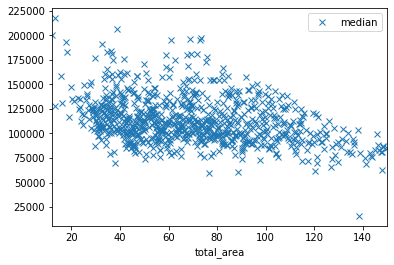

In [21]:
#Смотрим зависимость от площади
pivot_price_aria_spb=spb_sentr.pivot_table(index = 'total_area', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_aria_spb.columns = ['mean', 'count', 'median']
pivot_price_aria_spb.plot(y = 'median', style = 'x')

Зависимость не прослеживается, так же как и в общих данных.

,mean,count,median
rooms,,,
0,131950.888889,18,128149.0
1,127475.299163,956,122973.0
2,115812.531770,1322,110033.0
3,105373.245342,966,100380.0
4,95997.911538,260,94801.0
5,90244.796875,64,89345.5
6,93265.800000,5,83777.0
7,114011.666667,3,111940.0


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


nan

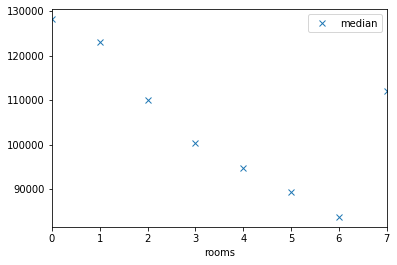

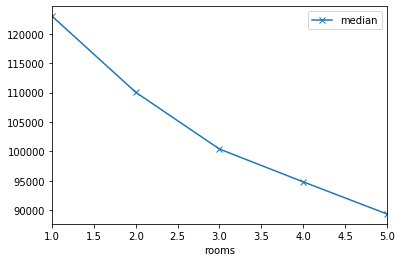

In [22]:
pivot_price_rooms_spb=spb_sentr.pivot_table(index = 'rooms', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_rooms_spb.columns = ['mean', 'count', 'median']
pivot_price_rooms_spb.plot(y = 'median', style = 'x')
display(pivot_price_rooms_spb)
#отрежем многоквартирные, но редкие продажи. Реже 60 штук (это мксимум 7 комнат)
pivot_price_rooms_spb.query('count>60').plot(y = 'median', style = 'x-')
display(spb_sentr['rooms'].corr(pivot_price_rooms_spb['median']))

В центре Питера больше котируются однушки. 

,mean,count,median
floor_category,,,
другой,116795.985075,2613,111662
первый,102542.296729,428,98854
последний,111399.095841,553,104328


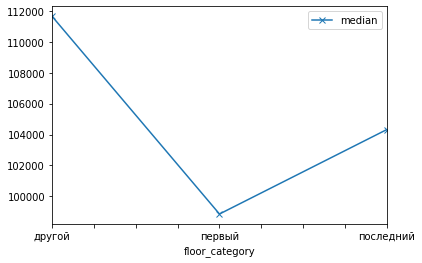

In [23]:
pivot_price_floor_spb=spb_sentr.pivot_table(index = 'floor_category', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_floor_spb.columns = ['mean', 'count', 'median']
pivot_price_floor_spb.plot(y = 'median', style = 'x-')
display(pivot_price_floor_spb)

Зависимоть та же, что и в общих данных.

,mean,count,median
ceiling_height,,,
2.40,108663.500000,4,114642.5
2.45,109318.000000,1,109318.0
2.46,108396.000000,1,108396.0
2.47,94510.000000,1,94510.0
2.48,92555.333333,3,88064.0
...,...,...,...
4.40,62962.000000,1,62962.0
4.70,98631.000000,1,98631.0
4.80,299000.000000,1,299000.0


nan

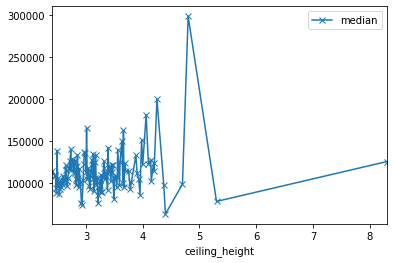

In [24]:
pivot_price_ceil_spb=spb_sentr.query('ceiling_height<20').pivot_table(index = 'ceiling_height', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_ceil_spb.columns = ['mean', 'count', 'median']
pivot_price_ceil_spb.plot(y = 'median', style = 'x-')
display(pivot_price_ceil_spb)
spb_sentr['ceiling_height'].corr(pivot_price_ceil_spb['median'])

Квартиры с высокими потолками стоят дороже, корреляция слабая, видимо в виду малого числа таких квартир.

,mean,count,median
weekday,,,
0,114619.741509,530,109281.5
1,113015.944870,653,107843.0
2,115296.587522,577,109745.0
3,114057.178161,696,109136.5
4,112809.663462,624,106540.5
5,117162.246575,292,111310.5
6,115393.261261,222,109404.0


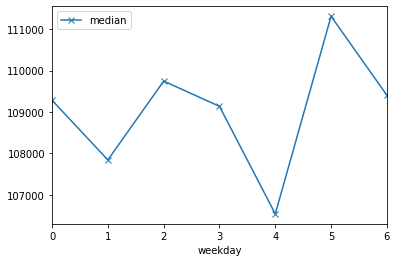

In [25]:
#день
pivot_price_weekday_spb=spb_sentr.pivot_table(index = 'weekday', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_weekday_spb.columns = ['mean', 'count', 'median']
pivot_price_weekday_spb.plot(y = 'median', style = 'x-')
display(pivot_price_weekday_spb)
#spb_sentr['weekday'].corr(pivot_price_weekday_spb['median'])

В центре Питера всплеск продаж приходится на четверг.

,mean,count,median
month,,,
1,116519.192118,203,110031.0
2,112821.027708,397,105492.0
3,117424.318841,345,112903.0
4,113699.216783,286,107093.0
5,113365.173913,230,104814.0
6,110694.457413,317,106172.0
7,112564.795699,279,107142.0
8,116941.155709,289,111450.0
9,117061.235127,353,113230.0


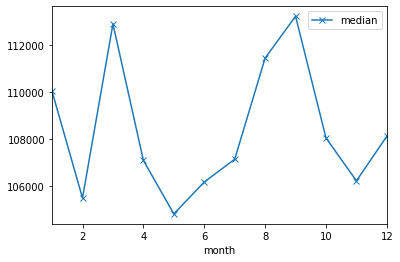

In [26]:
#месяц
pivot_price_month_spb=spb_sentr.pivot_table(index = 'month', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_month_spb.columns = ['mean', 'count', 'median']
pivot_price_month_spb.plot(y = 'median', style = 'x-')
display(pivot_price_month_spb)
#spb_sentr['month'].corr(pivot_price_month_spb['median'])

В общем и целом, картина по месяцам повторяет результат в общих данных.

,mean,count,median
year,,,
2014,110709.000000,11,105157.0
2015,107216.480519,154,101938.0
2016,110909.368313,486,104278.0
2017,113142.679752,1452,106341.5
2018,116238.396579,1286,111647.5
2019,123331.087805,205,119747.0


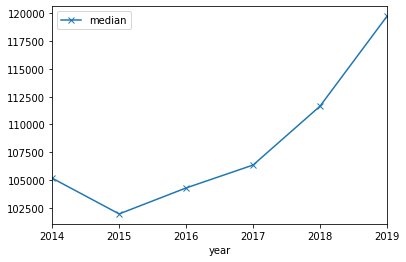

In [27]:
#год
pivot_price_year_spb=spb_sentr.pivot_table(index = 'year', values = 'prise_miter', aggfunc = ['mean', 'count', 'median'])
pivot_price_year_spb.columns = ['mean', 'count', 'median']
pivot_price_year_spb.plot(y = 'median', style = 'x-')
display(pivot_price_year_spb)
#spb_sentr['year'].corr(pivot_price_year_spb['median'])

Та же картина, что и в общих данных.

## Общий вывод

В каждом изученном столбце данных есть аномальные значения и пропуски, влияющие на выборку. 

Было принято решение отбросить аномальные значения, а пропуски заменить на подходящие значения.

Анализ показал, что на цену квадратного метра влияют такие показатели, как: 
- высота потолков;
- количесво комнат;
- этаж.

В основном квартиры продаются за первые 100 дней.
При этом:
- Лучше всего выставлять квартиру в конце недели;
- В начале или конце года;

В условном центре Санкт-Питербурга (10км.) есть некоторые изменения в зависимостях, но в целом картина сохраняется.